In [1]:
#Importinting Non-ML packages

from IPython import get_ipython
get_ipython().magic('reset -sf') 
#General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time
import requests
import json

#total run time is approximately 3-4 hours. 


#Random State numbers for ML models were chosen using a random number generator. 


In [2]:
#Machine Learning Imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,\
   VarianceThreshold, mutual_info_regression, RFECV,SelectFromModel
from sklearn.model_selection import RandomizedSearchCV,\
    GridSearchCV, cross_val_predict, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,\
    explained_variance_score, mean_absolute_error
from sklearn.externals import joblib


start1 = time.time()  #Used to determine total run time of project


    


# Postocde Transformation

This section covers the code used to convert postcodes to the latitude/longitude coordiante system.

In [3]:
#Test on postcode BA1 7JN
url = 'http://api.postcodes.io/postcodes'
payload = {'postcodes' : ['BA1 7JN']} # Example postcodes
headers = {'content-type': 'application/json'}
r = requests.post(url, data=json.dumps(payload),  headers=headers)
returnData = r.json()
result = returnData['result']

In [4]:
#function for latitude
def latitude(payload):

    r = requests.post(url, data=json.dumps(payload), headers=headers)
    returnData = r.json()
    result = returnData['result']
    lat = [result[idx]['result']['latitude'] if result[idx]['result'] is not None else np.nan for idx in
             range(len(result))]

    return lat

#Function for longitude
def longitude(payload):
    r = requests.post(url, data=json.dumps(payload), headers=headers)
    returnData = r.json()
    result = returnData['result']
    long = [result[idx]['result']['longitude'] if result[idx]['result'] is not None else np.nan for idx in
            range(len(result))]

    return long

print(latitude(payload))
#print(type(latitude(payload))) # check that a list is being printed

print(longitude(payload))

#Funtion to output latitude and longitude

def location(payload):
    if len(latitude(payload))==1:
        return list([latitude(payload)[0], longitude(payload)[0]])
    else:
        print('Try One Postoce')
print(location(payload))



#Function for addding long and lat coordiantes to a dataframe based upon a columns of postoces in the same dataframe
def postcode_df(post):
    postcode_list = post.tolist()
    url = 'http://api.postcodes.io/postcodes'

    payload = {'postcodes': postcode_list}

    headers = {'content-type': 'application/json'}

    loc= []

    for i in range(len(postcode_list)):
        payload = {'postcodes': [str(postcode_list[i])]}
        x = location(payload)
        loc.append(x)

    loc_df = pd.DataFrame(loc, columns=['latitude', 'longitude'])

    return loc_df



[51.408086]
[-2.309393]
[51.408086, -2.309393]


In [5]:
#df = pd.read_excel('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Data\\final_data\\final_combined.xlsx')
#df.reset_index(drop=True, inplace=True)

In [6]:
#df.columns

# Data Importing 

In [7]:
'''
This section was used for the first time import 
before transformation of postcodes.
Transformation process takes roughly 0.5 - 1 hour, 
due to the number of postcodes being transfomred.
It is recommnded that the transfomed dataset is used for importing
'''


'''
start = time.time()
df = pd.read_excel('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Data\\final_data\\final_combined.xlsx')
df.reset_index(drop=True, inplace=True)
#print(df.columns)
#print(df.head())


print(len(df))

post = df['Post Code']
postcode_list = post.tolist()
print(len(postcode_list))





postcodes  = postcode_df(post)

print(postcodes)

df.drop(['Post Code'], axis=1)
print(df.head())

end=time.time()

print('Time Taken: ', end -start)

#postcodes.reset_index(drop=True, inplace=True)

df2 = pd.concat([postcodes, df], axis=1)

print(df2.head())


df2.to_excel('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Data\\final_data\\final_combined_test_long_lat.xlsx')

'''

"\nstart = time.time()\ndf = pd.read_excel('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Data\\final_data\\final_combined.xlsx')\ndf.reset_index(drop=True, inplace=True)\n#print(df.columns)\n#print(df.head())\n\n\nprint(len(df))\n\npost = df['Post Code']\npostcode_list = post.tolist()\nprint(len(postcode_list))\n\n\n\n\n\npostcodes  = postcode_df(post)\n\nprint(postcodes)\n\ndf.drop(['Post Code'], axis=1)\nprint(df.head())\n\nend=time.time()\n\nprint('Time Taken: ', end -start)\n\n#postcodes.reset_index(drop=True, inplace=True)\n\ndf2 = pd.concat([postcodes, df], axis=1)\n\nprint(df2.head())\n\n\ndf2.to_excel('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Data\\final_data\\final_combined_test_long_lat.xlsx')\n\n"

In [8]:
#postcodes.reset_index(drop=True, inplace=True)

In [9]:
#Re-read excel spreadhseet with long/lat coordiantes 

df = pd.read_excel('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Data\\final_data\\final_combined_test_long_lat.xlsx')
print(df.iloc[0,:])

latitude                                                          54.5961
longitude                                                        -3.54073
Last Updated                                   2018-07-27 02:03:56.420000
Post Code                                                        CA14 5UA
Name                                                                   ML
Bedrooms                                                                3
Age                                                                    27
Marital Status                                                    Married
Property Type                                         Semi-detached house
Property Age                                                         1900
Ownership                                                Rented Furnished
Voluntary Excess                                                      500
Occupied During The Day                                         Unchecked
Business Use                          

In [10]:
#This was done so that all columns were capitalised
df = df.rename(columns={"latitude": "Latitude", "longitude": "Longitude"})

In [11]:
#Removing unessecary columns
df = df.drop(['Last Updated', 'Name', 'Post Code', 'Area Band Contents'], axis=1)
print(df.head())

    Latitude  Longitude  Bedrooms  Age Marital Status        Property Type  \
0  54.596059  -3.540730         3   27        Married  Semi-detached house   
1  51.209800   0.245404         2   59    Co habiting        Semi-Detached   
2  53.215239  -1.222079         2   71        Married                 Flat   
3  51.575604  -1.149207         3   73  Widow/Widower       Terraced house   
4  53.808922  -1.670827         3   33    Co habiting       Terraced house   

   Property Age         Ownership  Voluntary Excess Occupied During The Day  \
0          1900  Rented Furnished               500               Unchecked   
1          1900         Mortgaged               150               Unchecked   
2          2007         Mortgaged               100               Unchecked   
3          1988         Mortgaged               350                 Checked   
4          1966  Rented Furnished               500               Unchecked   

                   ...                   Value Of Claims

In [12]:
print(df.columns)

Index(['Latitude', 'Longitude', 'Bedrooms', 'Age', 'Marital Status',
       'Property Type', 'Property Age', 'Ownership', 'Voluntary Excess',
       'Occupied During The Day', 'Business Use', 'Lodgers', 'Subsidence',
       'Working Smoke Alarm', 'Cover Outside Home', 'Flat Roof',
       'Include Buildings', 'Include Contents', 'Accidental Damage Cover',
       'Accidental Damage Contents', 'Have Buildings Claims',
       'Have Made Content Claims',
       'How Long Have You Held Buildings Insurance',
       'How Long Have You Held Contents Insurance', 'Main Entrance Door Locks',
       'Monitored Alarm', 'Number Of Claims Previous 12months',
       'Number Of Claims 13to 24months', 'Number Of Claims 25to 36 Months',
       'Number Of Claims 37to 48 Months', 'Number Of Claims 49to 60 Months',
       'Number Of Content Claims Previous 12months',
       'Number Of Content Claims 13to 24months',
       'Number Of Content Claims 25to 36 Months',
       'Number Of Content Claims 37to 48 Mon

Below section converts a number of the categorical varialbes to 0/1 binary variables. 

In [13]:
#Converting 'yes' or 'no' categorical variables into numerical variables

x = ['Occupied During The Day', 'Business Use', 'Lodgers', 'Subsidence',
       'Working Smoke Alarm', 'Cover Outside Home', 'Flat Roof',
       'Include Buildings', 'Include Contents', 'Accidental Damage Cover',
       'Accidental Damage Contents', 'Have Buildings Claims',
       'Have Made Content Claims', 'Monitored Alarm']


for i, word in enumerate(x):
    df[str(word)] = df[str(word)].eq('Checked').mul(1)

print(df.iloc[0,:])

Latitude                                                          54.5961
Longitude                                                        -3.54073
Bedrooms                                                                3
Age                                                                    27
Marital Status                                                    Married
Property Type                                         Semi-detached house
Property Age                                                         1900
Ownership                                                Rented Furnished
Voluntary Excess                                                      500
Occupied During The Day                                                 0
Business Use                                                            0
Lodgers                                                                 0
Subsidence                                                              0
Working Smoke Alarm                   

# Feature Anaylsis

In [14]:
#This section analyses a handful of the features

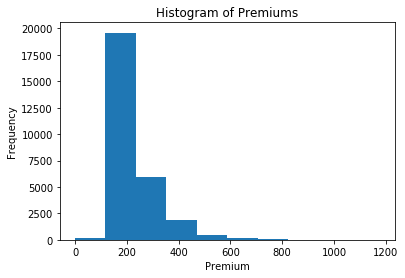

In [15]:
#Premium
plt.hist(df['UKGQuote'])
plt.xlabel('Premium')
plt.ylabel('Frequency')
plt.title('Histogram of Premiums')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\Prem_Hist.pdf')
plt.show()

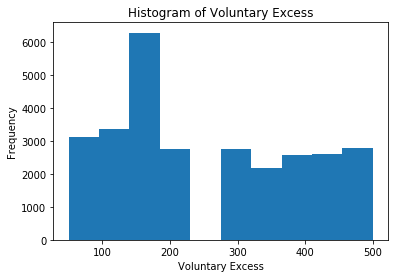

In [16]:
#Voluntary Excess
plt.hist(df['Voluntary Excess'])
plt.xlabel('Voluntary Excess')
plt.ylabel('Frequency')
plt.title('Histogram of Voluntary Excess')
plt.show()

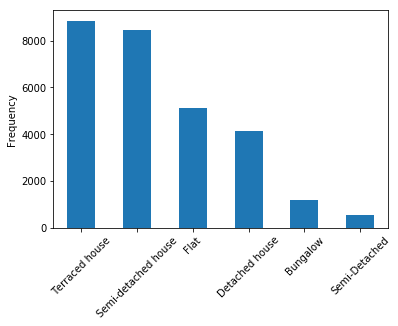

In [17]:
df['Property Type'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

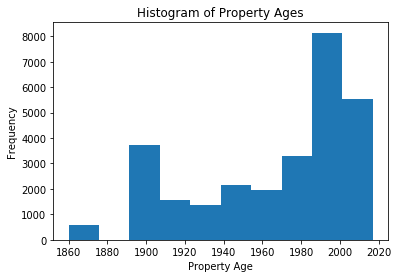

In [18]:
plt.hist(df['Property Age'])
plt.xlabel('Property Age')
plt.ylabel('Frequency')
plt.title('Histogram of Property Ages')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\Prop_Age_Hist.pdf')
plt.show()

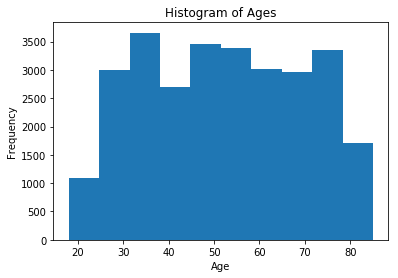

In [19]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\Age_Hist.pdf')
plt.show()

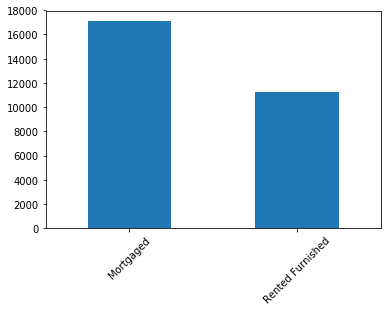

In [20]:
df['Ownership'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

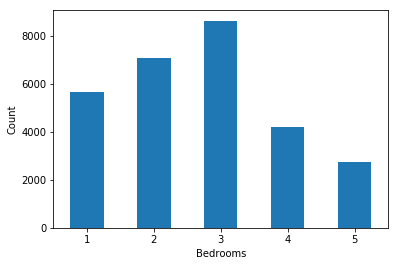

In [21]:
df['Bedrooms'].value_counts(ascending=True, sort=False).plot(kind='bar')
plt.xlabel('Bedrooms')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

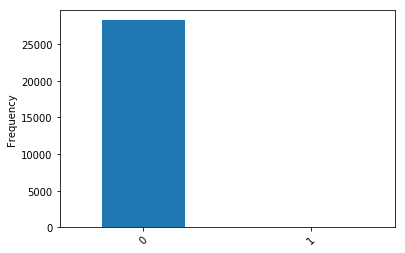

In [22]:
df['Number Of Claims 13to 24months'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
#plt.title('Total Value Of Claims Previous 12 Months')
plt.ylabel('Frequency')
plt.show()

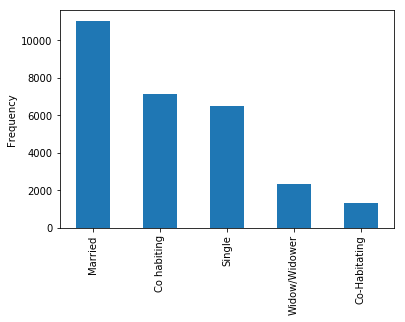

In [23]:
df['Marital Status'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

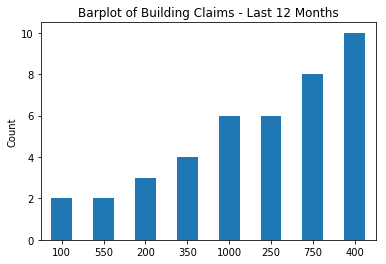

In [24]:
df2 = df[df['Value Of Claims Previous 12 Months']>0]

df2['Value Of Claims Previous 12 Months'].value_counts( ascending=True, sort=True).plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.title('Barplot of Building Claims - Last 12 Months')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\claim_amount_build.pdf')
plt.show()

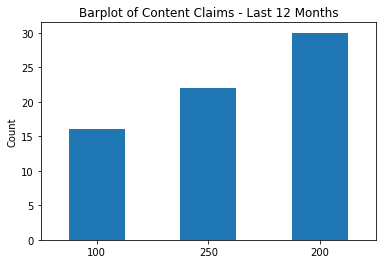

In [25]:
df3 = df[df['Value Of Content Claims Previous 12 Months']>0]

df3['Value Of Content Claims Previous 12 Months'].value_counts( ascending=True, sort=True).plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.title('Barplot of Content Claims - Last 12 Months')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\claim_amount_cont.pdf')
plt.show()

# Data Pre-Processing

In [26]:
#This section is concerned with removing observations where categorical variables classes have been misspelled


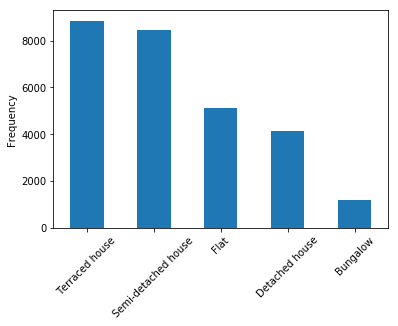

In [27]:
df = df[df['Property Type'] != 'Semi-Detached']
df['Property Type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\Prop_type.pdf')
plt.show()

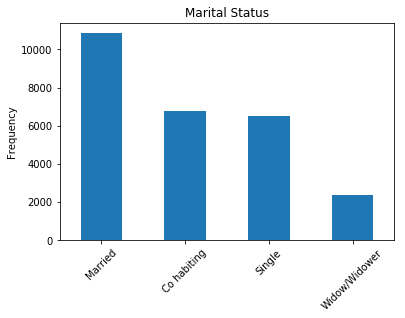

In [28]:
df = df[df['Marital Status'] != 'Co-Habitating']



df['Marital Status'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Marital Status')
plt.ylabel('Frequency')
plt.show()

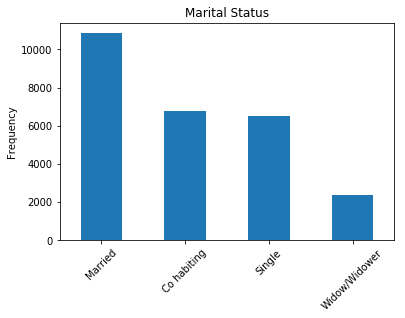

In [29]:
df['Marital Status'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Marital Status')
plt.ylabel('Frequency')
plt.show()

In [30]:
y = df['UKGQuote'] #Remove the response variable
y=pd.Series(y)
df=df.drop(['UKGQuote'], axis=1)

In [31]:
#Transfrom multi class categorical variables into dummy variables
cols_to_transfrom = ['Marital Status', 'Property Type', 'Ownership','Main Entrance Door Locks']
df = pd.get_dummies(df, columns= cols_to_transfrom)
print(df.head())

    Latitude  Longitude  Bedrooms  Age  Property Age  Voluntary Excess  \
0  54.596059  -3.540730         3   27          1900               500   
2  53.215239  -1.222079         2   71          2007               100   
3  51.575604  -1.149207         3   73          1988               350   
4  53.808922  -1.670827         3   33          1966               500   
5  51.502585  -2.594544         1   47          1953               300   

   Occupied During The Day  Business Use  Lodgers  Subsidence  \
0                        0             0        0           0   
2                        0             0        1           0   
3                        1             1        0           0   
4                        0             0        0           0   
5                        0             0        0           0   

                          ...                          Property Type_Bungalow  \
0                         ...                                               0   
2 

In [32]:
df.sum()

Latitude                                                  1.387446e+06
Longitude                                                -3.591943e+04
Bedrooms                                                  7.009000e+04
Age                                                       1.377772e+06
Property Age                                              5.210368e+07
Voluntary Excess                                          6.755850e+06
Occupied During The Day                                   2.351000e+03
Business Use                                              2.387000e+03
Lodgers                                                   1.174000e+03
Subsidence                                                0.000000e+00
Working Smoke Alarm                                       2.645700e+04
Cover Outside Home                                        5.164000e+03
Flat Roof                                                 0.000000e+00
Include Buildings                                         2.460900e+04
Includ

In [33]:
X = df.as_matrix()
#Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)



In [34]:
scaler=StandardScaler()
#Sacle the observations
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Feature Selection - Variance Threshold

In [35]:
print('Variance Threshold')


print( np.var(X_train, axis=0))



Variance Threshold
[  1.57964983e+00   1.76664466e+00   1.48558480e+00   3.03738983e+02
   1.65337128e+03   2.33622760e+04   8.03281001e-02   8.16807903e-02
   4.24079107e-02   0.00000000e+00   4.44642062e-05   1.55986280e-01
   0.00000000e+00   6.54734250e-02   2.31176048e-01   2.18134361e-01
   1.66345839e-01   1.35945040e-02   6.87820579e-02   2.34823442e+00
   2.28450704e+00   6.45171322e-02   1.46523084e-03   2.35115365e-03
   3.36800940e-03   7.41451316e-03   9.20706446e-03   2.52814840e-03
   3.63293207e-03   2.66085294e-03   2.15687940e-02   2.56310287e-02
   5.21205133e+02   2.36546463e+02   6.15706193e+02   1.55085288e+03
   1.49409684e+03   9.94826506e+01   1.43811584e+02   1.13993369e+02
   8.17466157e+02   9.66325638e+02   1.90828340e-01   2.41904081e-01
   1.85024768e-01   8.03647305e-02   4.35004987e-02   1.32723674e-01
   1.56285990e-01   1.97466928e-01   2.21845461e-01   2.39398940e-01
   2.39398940e-01   2.24552593e-01   3.55859926e-02   2.11380559e-01]


In [36]:

'''
#Bar plot of variance 
%matplotlib inline
plt.figure(figsize=(10,10))
plt.barh(y=range(len(np.var(X_train_mms, axis=0))),width = np.var(X_train_mms, axis=0), tick_label = df.columns)
plt.title('Variancce Threshold - Min Max Scaled')
plt.ylabel('Feature')
plt.tight_layout()
#plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_vt_mms.pdf')
plt.show()

'''

"\n#Bar plot of variance \n%matplotlib inline\nplt.figure(figsize=(10,10))\nplt.barh(y=range(len(np.var(X_train_mms, axis=0))),width = np.var(X_train_mms, axis=0), tick_label = df.columns)\nplt.title('Variancce Threshold - Min Max Scaled')\nplt.ylabel('Feature')\nplt.tight_layout()\n#plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_vt_mms.pdf')\nplt.show()\n\n"

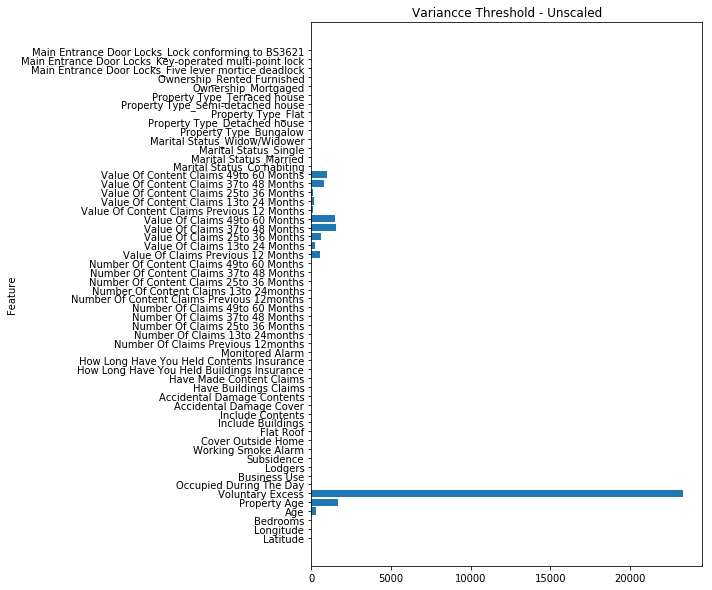

In [37]:
plt.figure(figsize=(7,10))

plt.barh(y=range(len(np.var(X_train, axis=0))),width = np.var(X_train, axis=0), tick_label = df.columns)
plt.ylabel('Feature')
plt.title('Variancce Threshold - Unscaled')
plt.show()



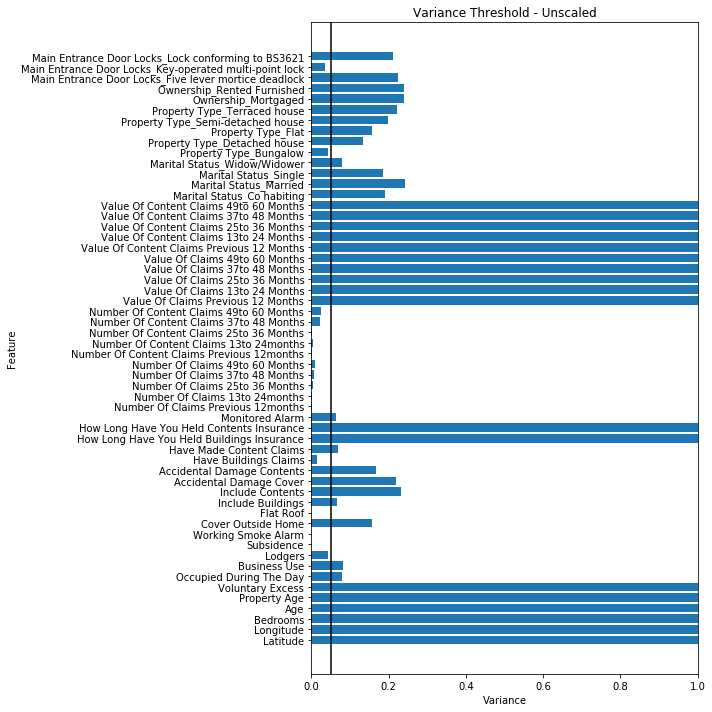

In [38]:
plt.figure(figsize=(10,10))
#print(type(plt.xlim))
ax = plt.gca()
ax.set_xlim(0, 1)
plt.barh(y=range(len(np.var(X_train, axis=0))),width = np.var(X_train, axis=0), tick_label = df.columns)
plt.axvline(x=0.05, color = 'k')
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.title('Variance Threshold - Unscaled')
plt.tight_layout()
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_vt_us.pdf')
plt.show()



In [39]:
thresh = VarianceThreshold(threshold=0.05) # Initialise VT method
X_train_vt = thresh.fit_transform(X_train) #Fitting and transforming unscaled data
X_test_vt = thresh.transform(X_test)

scaler=StandardScaler()
X_train_vt = scaler.fit_transform(X_train_vt) #Scaling the VT feature sets
X_test_vt  = scaler.transform(X_test_vt)

vt_names = list(df.columns[thresh.get_support(indices=True)])
print(vt_names)
print(len(vt_names))
print(len(df.columns))


['Latitude', 'Longitude', 'Bedrooms', 'Age', 'Property Age', 'Voluntary Excess', 'Occupied During The Day', 'Business Use', 'Cover Outside Home', 'Include Buildings', 'Include Contents', 'Accidental Damage Cover', 'Accidental Damage Contents', 'Have Made Content Claims', 'How Long Have You Held Buildings Insurance', 'How Long Have You Held Contents Insurance', 'Monitored Alarm', 'Value Of Claims Previous 12 Months', 'Value Of Claims 13to 24 Months', 'Value Of Claims 25to 36 Months', 'Value Of Claims 37to 48 Months', 'Value Of Claims 49to 60 Months', 'Value Of Content Claims Previous 12 Months', 'Value Of Content Claims 13to 24 Months', 'Value Of Content Claims 25to 36 Months', 'Value Of Content Claims 37to 48 Months', 'Value Of Content Claims 49to 60 Months', 'Marital Status_Co habiting', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widow/Widower', 'Property Type_Detached house', 'Property Type_Flat', 'Property Type_Semi-detached house', 'Property Type_Terraced ho

# Feature Selection - Select K Best

In [40]:
print('Select K Best')


Select K Best


In [41]:
skb=SelectKBest(mutual_info_regression, k =30) #Initialise SKB FS method with K = 30
X_train_skb = skb.fit_transform(X_train_std, y_train) #Performing Feature Selection 
X_test_skb = skb.transform(X_test_std)#Transform test data using SKB feature selection



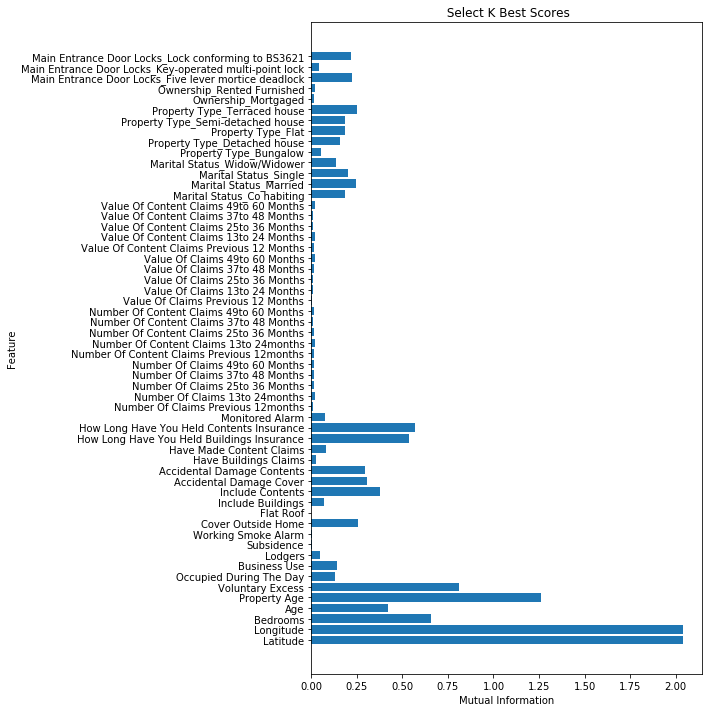

In [42]:
plt.figure(figsize=(10,10))

plt.barh(y=range(len(skb.scores_)), width = skb.scores_, align='center' ,tick_label = df.columns)
plt.xlabel("Mutual Information")
plt.title(" Select K Best Scores")
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_skb.pdf')
plt.show()


In [43]:
skb_names = list(df.columns[skb.get_support(indices=True)])
print(skb_names)
print(len(skb_names))

['Latitude', 'Longitude', 'Bedrooms', 'Age', 'Property Age', 'Voluntary Excess', 'Occupied During The Day', 'Business Use', 'Lodgers', 'Cover Outside Home', 'Include Buildings', 'Include Contents', 'Accidental Damage Cover', 'Accidental Damage Contents', 'Have Made Content Claims', 'How Long Have You Held Buildings Insurance', 'How Long Have You Held Contents Insurance', 'Monitored Alarm', 'Marital Status_Co habiting', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widow/Widower', 'Property Type_Bungalow', 'Property Type_Detached house', 'Property Type_Flat', 'Property Type_Semi-detached house', 'Property Type_Terraced house', 'Main Entrance Door Locks_Five lever mortice deadlock', 'Main Entrance Door Locks_Key-operated multi-point lock', 'Main Entrance Door Locks_Lock conforming to BS3621']
30


# Feature Selection - ERT

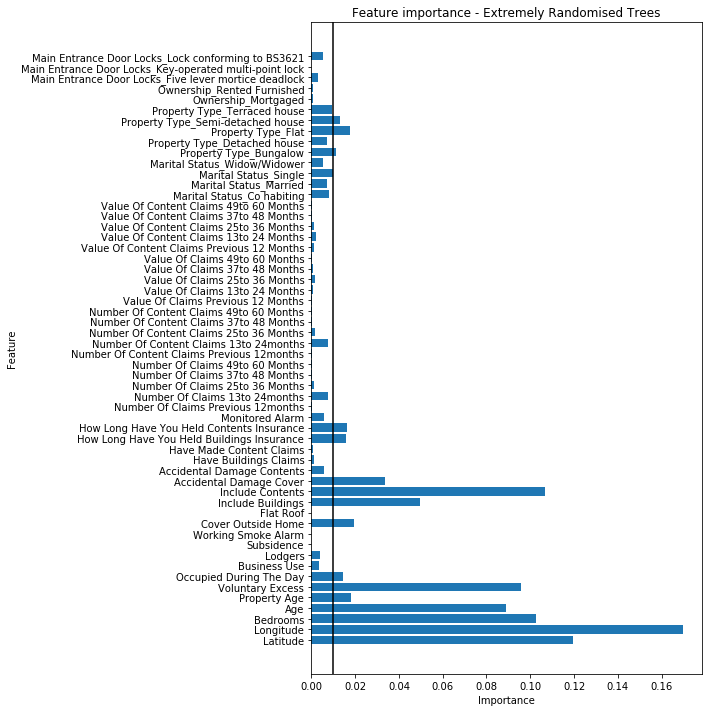

In [44]:
plt.figure(figsize=(10,10))
model = ExtraTreesRegressor(random_state=23) #Initilise ERT model
model.fit(X_train_std, y_train) #Fit ERT model to training data
plt.barh(y=range(len(model.feature_importances_)),width=model.feature_importances_, align='center' ,tick_label = df.columns)
plt.title('Feature importance - Extremely Randomised Trees')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.axvline(x=0.01, color = 'k')
#figure = plt.gcf() # get current figure
#figure.set_size_inches(7, 10)#Set figure size for exporting to LATEX
plt.tight_layout()
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_ert.pdf')
plt.show()

In [45]:
importances = pd.DataFrame({'Feature': df.columns, 'Importance': np.round(model.feature_importances_, 3)})
importances=importances.sort_values('Importance', ascending=False).set_index('Feature')
print(importances)

                                                    Importance
Feature                                                       
Longitude                                                0.170
Latitude                                                 0.120
Include Contents                                         0.107
Bedrooms                                                 0.103
Voluntary Excess                                         0.096
Age                                                      0.089
Include Buildings                                        0.050
Accidental Damage Cover                                  0.034
Cover Outside Home                                       0.020
Property Age                                             0.018
Property Type_Flat                                       0.017
How Long Have You Held Buildings Insurance               0.016
How Long Have You Held Contents Insurance                0.016
Occupied During The Day                                

In [46]:
#plt.figure(figsize=(7,10))
#importances.plot.barh()
#plt.title('Feature Importance')


In [47]:
sfm=SelectFromModel(ExtraTreesRegressor(random_state=23), threshold=0.01) #Select variables from fitted ERT model where importance is other theshold 0.01
X_train_etr = sfm.fit_transform(X_train_std, y_train) #Transform training data, removing features deemed unimportant
X_test_etr = sfm.transform(X_test_std)#Transform test data, removing features deemed unimportant

In [48]:
etr_names = list(df.columns[sfm.get_support(indices=True)])
print(etr_names)
print(len(etr_names))

['Latitude', 'Longitude', 'Bedrooms', 'Age', 'Property Age', 'Voluntary Excess', 'Occupied During The Day', 'Cover Outside Home', 'Include Buildings', 'Include Contents', 'Accidental Damage Cover', 'How Long Have You Held Buildings Insurance', 'How Long Have You Held Contents Insurance', 'Property Type_Bungalow', 'Property Type_Flat', 'Property Type_Semi-detached house']
16


# Feature Selection - RFE

In [49]:
#Linear Regression -  standardised
inner_cv = KFold(n_splits=4, shuffle=True, random_state=7) #Initialise the folds for cv
estimator = LinearRegression() #Initialise LR model
selector=RFECV(estimator, step=1, cv=inner_cv) #Initilise RFECV object
X_train_lr_std = selector.fit_transform(X_train_std, y_train) #Fit RFECV model to training data
X_test_lr_std = selector.transform(X_test_std) #Transform test data using RFECV object, removing varaibles algorithim deems unimportant


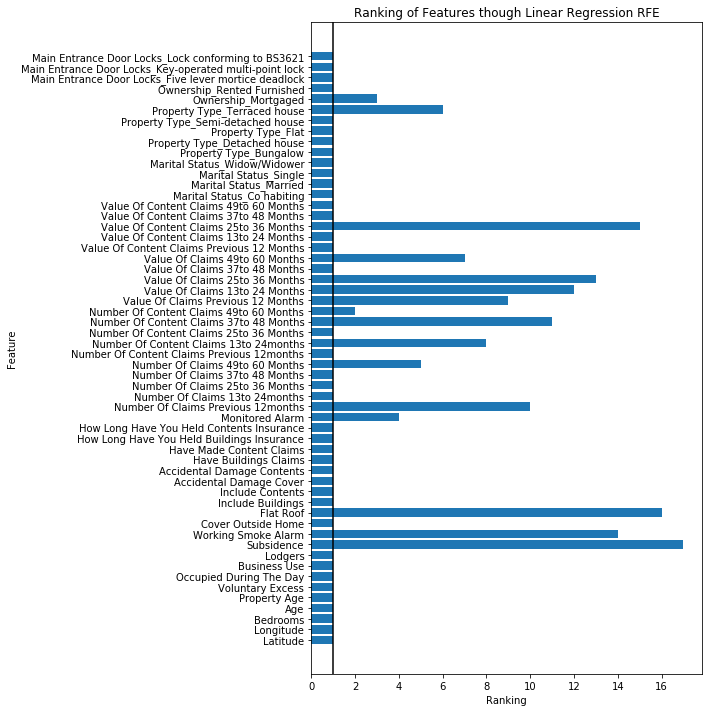

In [50]:
plt.figure(figsize=(10,10))

plt.barh(y=range(len(selector.ranking_)), width = selector.ranking_, align = 'center', tick_label = df.columns )
plt.axvline(x=1, color = 'k')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Ranking of Features though Linear Regression RFE')
plt.tight_layout()
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_rfe_lr_s.pdf')
plt.show()

In [51]:
'''
inner_cv = KFold(n_splits=4, shuffle=True, random_state=7)
estimator = LinearRegression()
selector=RFECV(estimator, step=1, cv=inner_cv)
X_train_lr = selector.fit_transform(X_train, y_train)
X_test_lr = selector.transform(X_test)
'''

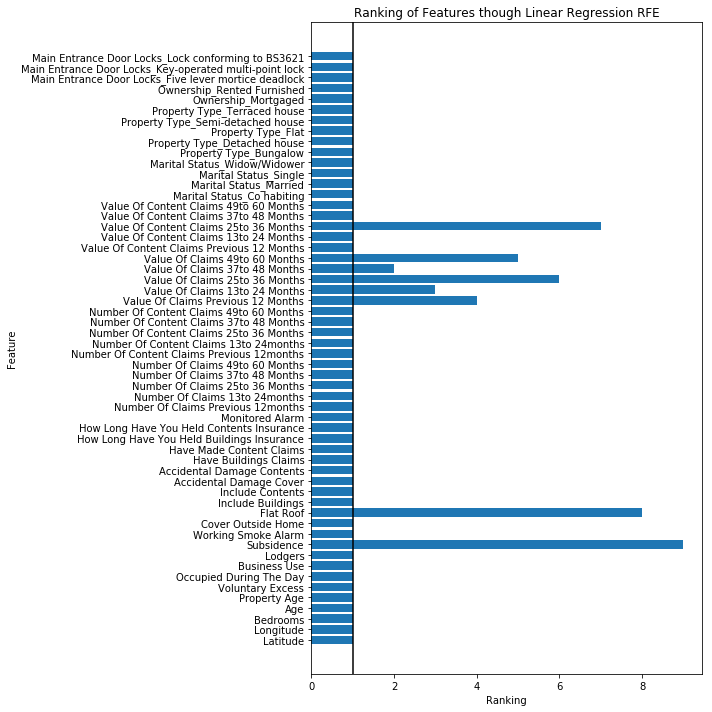

In [52]:
'''
plt.figure(figsize=(10,10))

plt.barh(y=range(len(selector.ranking_)), width = selector.ranking_, align = 'center', tick_label = df.columns )
plt.axvline(x=1, color = 'k')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Ranking of Features though Linear Regression RFE')
plt.tight_layout()
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_rfe_lr.pdf')
plt.show()
'''

In [53]:
rfe_lr_names = list(df.columns[selector.get_support(indices=True)])
print(rfe_lr_names)
print(len(rfe_lr_names))

['Latitude', 'Longitude', 'Bedrooms', 'Age', 'Property Age', 'Voluntary Excess', 'Occupied During The Day', 'Business Use', 'Lodgers', 'Working Smoke Alarm', 'Cover Outside Home', 'Include Buildings', 'Include Contents', 'Accidental Damage Cover', 'Accidental Damage Contents', 'Have Buildings Claims', 'Have Made Content Claims', 'How Long Have You Held Buildings Insurance', 'How Long Have You Held Contents Insurance', 'Monitored Alarm', 'Number Of Claims Previous 12months', 'Number Of Claims 13to 24months', 'Number Of Claims 25to 36 Months', 'Number Of Claims 37to 48 Months', 'Number Of Claims 49to 60 Months', 'Number Of Content Claims Previous 12months', 'Number Of Content Claims 13to 24months', 'Number Of Content Claims 25to 36 Months', 'Number Of Content Claims 37to 48 Months', 'Number Of Content Claims 49to 60 Months', 'Value Of Content Claims Previous 12 Months', 'Value Of Content Claims 13to 24 Months', 'Value Of Content Claims 37to 48 Months', 'Value Of Content Claims 49to 60 Mo

In [54]:
#SVM
#This section of code takes around 50-60 minutes to run
#If one experinces computer slow down simply remove the 'n_jobs = -1' in selector and clf2
#Code execution time will slow down (taking about 40 minutes) but computer will run efficnetly with no slowdown
print('SVMR')

start = time.time()
#p_grid2 =  {'estimator__C': [1,5,10,0.5,0.1], 'estimator__epsilon': [0.1, 0.01,0.5,0.001]}
#Hashed ouuent runs to spped things up the smaller set t p_grid2 was an old version using a larger grid of HPs
#In subseqbelow was used
p_grid2 =  {'estimator__C': [1,5,10,0.1], 'estimator__epsilon': [0.1, 0.01,0.5]}#Initialise parameter grid
inner_cv = KFold(n_splits=4, shuffle=True, random_state=9)#create fold object for CV - decides number of folds for CV
#p_grid={"kernel": ['linear', 'rbf', 'poly'],  "epsilon": [0.1, 0.01,0.5,0.001], "C": [1,5,10,0.5,0.1],"degree": [2,3,4]}
estimator = LinearSVR(random_state=12) #Inialise SVMR model
selector = RFECV(estimator,step=1, cv=inner_cv, n_jobs=-1) #Initilise RFECV object on SVMR model
clf2 = RandomizedSearchCV(selector, param_distributions=p_grid2, cv=7, random_state=31, n_jobs=-1) #Initiliase RSCV model on RFECV object

clf2.fit(X_train_std, y_train) #fit RSCV model to training data
X_test_svr = clf2.transform(X_test_std)#Transform the test data, removing features that the RFE algorithim decides are unimportant

print(clf2.best_params_)
print(clf2.best_estimator_.estimator_)#A check to see if the parameters of the best estiamtor match with the above

#svmr1=LinearSVR(**clf2.best_params_)

end=time.time()

print("Time taken: ", end-start)
#svmr2 = clf.best_estimator_.estimator_ #Should be the same as above, print to check


SVMR
{'estimator__epsilon': 0.5, 'estimator__C': 10}
LinearSVR(C=10, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=12, tol=0.0001, verbose=0)
Time taken:  3696.582140684128


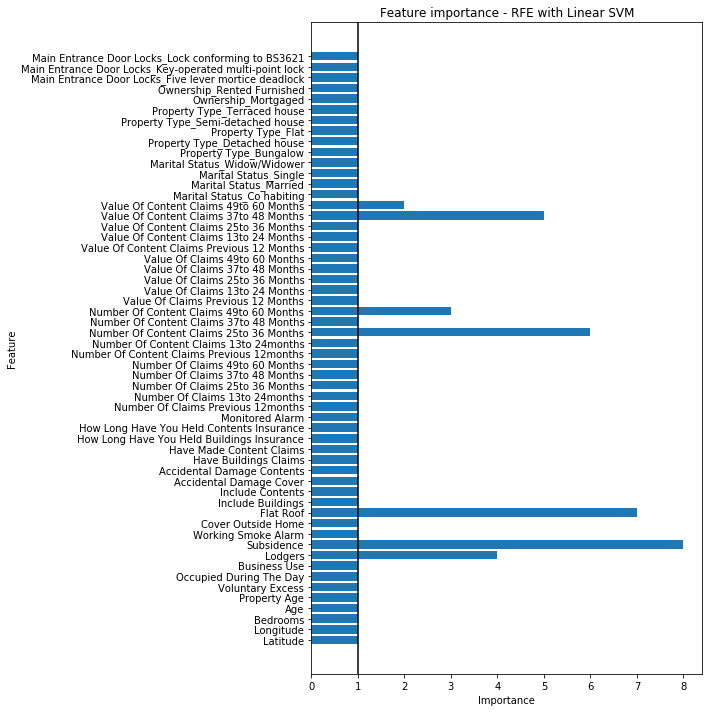

In [55]:
plt.figure(figsize=(10,10))
plt.barh(y=range(len(clf2.best_estimator_.ranking_)),width=clf2.best_estimator_.ranking_, align='center' ,tick_label = df.columns)
plt.title('Feature importance - RFE with Linear SVM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.axvline(x=1, color = 'k')
plt.tight_layout()
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_rfe_svmr.pdf')

plt.show()

In [56]:
rfe_svm_names = list(df.columns[clf2.best_estimator_.get_support(indices=True)])
print(rfe_svm_names)
print(len(rfe_svm_names))

['Latitude', 'Longitude', 'Bedrooms', 'Age', 'Property Age', 'Voluntary Excess', 'Occupied During The Day', 'Business Use', 'Working Smoke Alarm', 'Cover Outside Home', 'Include Buildings', 'Include Contents', 'Accidental Damage Cover', 'Accidental Damage Contents', 'Have Buildings Claims', 'Have Made Content Claims', 'How Long Have You Held Buildings Insurance', 'How Long Have You Held Contents Insurance', 'Monitored Alarm', 'Number Of Claims Previous 12months', 'Number Of Claims 13to 24months', 'Number Of Claims 25to 36 Months', 'Number Of Claims 37to 48 Months', 'Number Of Claims 49to 60 Months', 'Number Of Content Claims Previous 12months', 'Number Of Content Claims 13to 24months', 'Number Of Content Claims 37to 48 Months', 'Value Of Claims Previous 12 Months', 'Value Of Claims 13to 24 Months', 'Value Of Claims 25to 36 Months', 'Value Of Claims 37to 48 Months', 'Value Of Claims 49to 60 Months', 'Value Of Content Claims Previous 12 Months', 'Value Of Content Claims 13to 24 Months', 

In [57]:
print("Random Forest")
start = time.time()

#Hyper-parameter optimisation and RFE feature selection for Random Forests 

p_grid3 =  {'estimator__n_estimators': [ 20, 50, 100],'estimator__max_features': [0.1,0.25,0.5,0.7]} #Initialise parameter grid
inner_cv = KFold(n_splits=4, shuffle=True, random_state=39) #create fold object for CV
estimator = RandomForestRegressor( n_jobs=-1, random_state=64) #Initialise Random Forest Model
selector = RFECV(estimator,step=1, cv=inner_cv, n_jobs=-1) #Initilise RFECV object on Random Forest model
clf3 = RandomizedSearchCV(selector, param_distributions=p_grid3, cv=3, random_state=89, verbose = 2, n_jobs=-1) #Initilaise RSCV object on RFECV object  

clf3.fit(X_train_std, y_train) #Fit the RSCV object to the train data 
X_test_rf = clf3.transform(X_test_std)#transform the test data
#Training data is transformed later



end=time.time()




Random Forest
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 39.4min finished


In [58]:
print(clf3.best_params_) #Print out of the best paramets, used to ahjust the original parmaeter grid for subsequent runs
print(clf3.best_estimator_.estimator_)#A check to see if the parameters of the best estiamtor match with the above

print("Time taken: ", end-start)



{'estimator__n_estimators': 50, 'estimator__max_features': 0.7}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=64, verbose=0, warm_start=False)
Time taken:  2538.371036529541


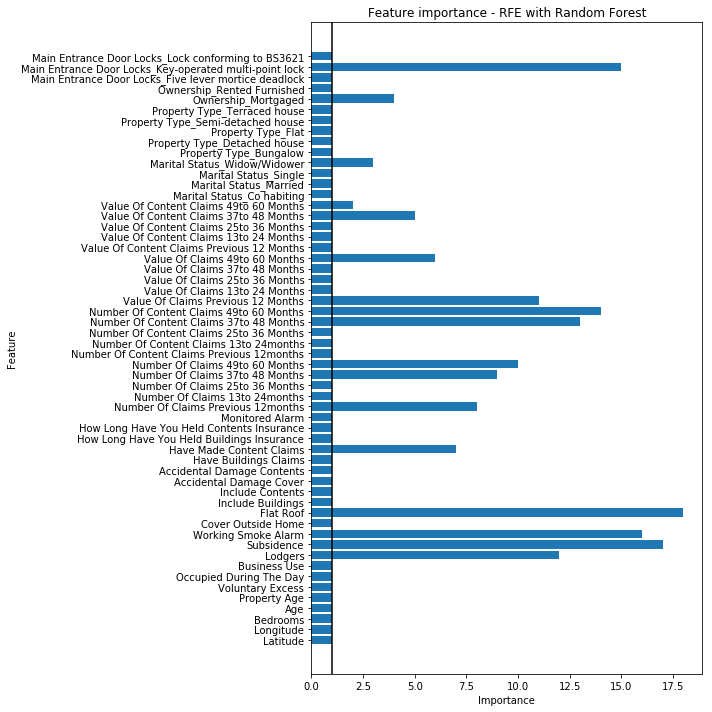

In [59]:
plt.figure(figsize=(10,10))
plt.barh(y=range(len(clf3.best_estimator_.ranking_)),width=clf3.best_estimator_.ranking_, align='center' ,tick_label = df.columns)
plt.title('Feature importance - RFE with Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.axvline(x=1, color = 'k')
plt.tight_layout()
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\fi_rfe_rf.pdf')

plt.show()

In [60]:
rfe_rf_names = list(df.columns[clf3.best_estimator_.get_support(indices=True)])
print(rfe_rf_names)
print(len(rfe_rf_names))

['Latitude', 'Longitude', 'Bedrooms', 'Age', 'Property Age', 'Voluntary Excess', 'Occupied During The Day', 'Business Use', 'Cover Outside Home', 'Include Buildings', 'Include Contents', 'Accidental Damage Cover', 'Accidental Damage Contents', 'Have Buildings Claims', 'How Long Have You Held Buildings Insurance', 'How Long Have You Held Contents Insurance', 'Monitored Alarm', 'Number Of Claims 13to 24months', 'Number Of Claims 25to 36 Months', 'Number Of Content Claims Previous 12months', 'Number Of Content Claims 13to 24months', 'Number Of Content Claims 25to 36 Months', 'Value Of Claims 13to 24 Months', 'Value Of Claims 25to 36 Months', 'Value Of Claims 37to 48 Months', 'Value Of Content Claims Previous 12 Months', 'Value Of Content Claims 13to 24 Months', 'Value Of Content Claims 25to 36 Months', 'Marital Status_Co habiting', 'Marital Status_Married', 'Marital Status_Single', 'Property Type_Bungalow', 'Property Type_Detached house', 'Property Type_Flat', 'Property Type_Semi-detached

#  Linear Regression

In [61]:
#Fitting Liner Regression models to the feature datasets and then 
#printing the metrics 

#This section fits LR models to the feature subsets and makes predictions using the test set


lr_vt = LinearRegression()#Initialise a LR model
lr_vt.fit(X_train_vt, y_train)#Fit LR model tp training data subset




lr_rfe = LinearRegression()
lr_rfe.fit(X_train_lr, y_train)

lr_rfe_std = LinearRegression()
lr_rfe_std.fit(X_train_lr_std, y_train)

print('Variance Threshold')

print()#These double print blocks are used throughout the code to avoid the outputs becoming walls of text
print()

print('Mean Squared Error: ', mean_squared_error(y_test, lr_vt.predict(X_test_vt)))
print('R2: ', r2_score(y_test, lr_vt.predict(X_test_vt)))
print('Explained Variance Score: ', explained_variance_score(y_test, lr_vt.predict(X_test_vt)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_vt.predict(X_test_vt)))



print()
print()

print('Select K Best')


lr_skb = LinearRegression()
lr_skb.fit(X_train_skb, y_train)

print()
print()

print('Mean Squared Error: ', mean_squared_error(y_test, lr_skb.predict(X_test_skb)))
print('R2: ', r2_score(y_test, lr_skb.predict(X_test_skb)))
print('Explained Variance Score: ', explained_variance_score(y_test, lr_skb.predict(X_test_skb)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_skb.predict(X_test_skb)))



print()
print()



print('Extremely Randomised Trees')

print()
print()

lr_etr = LinearRegression()
lr_etr.fit(X_train_etr, y_train)

print('Mean Squared Error: ', mean_squared_error(y_test, lr_etr.predict(X_test_etr)))
print('R2: ', r2_score(y_test, lr_etr.predict(X_test_etr)))
print('Explained Variance Score: ', explained_variance_score(y_test, lr_etr.predict(X_test_etr)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_etr.predict(X_test_etr)))



print()
print()

print('Recursive Feature Elimination')



lr_rfe_std = LinearRegression()
lr_rfe_std.fit(X_train_lr_std, y_train)

print()
print()

print('Mean Squared Error: ', mean_squared_error(y_test, lr_rfe_std.predict(X_test_lr_std)))
print('R2: ', r2_score(y_test, lr_rfe_std.predict(X_test_lr_std)))
print('Explained Variance Score: ', explained_variance_score(y_test, lr_rfe_std.predict(X_test_lr_std)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_rfe_std.predict(X_test_lr_std)))


Variance Threshold


Mean Squared Error:  3726.4079179
R2:  0.502449557592
Explained Variance Score:  0.502471779617
Mean Absolute Error:  42.8046994729


Select K Best


Mean Squared Error:  3859.28350592
R2:  0.484707992777
Explained Variance Score:  0.484746623749
Mean Absolute Error:  43.3257786961


Extremely Randomised Trees


Mean Squared Error:  4081.62998964
R2:  0.455020262989
Explained Variance Score:  0.455058339685
Mean Absolute Error:  44.3077817849


Recursive Feature Elimination


Mean Squared Error:  3700.18204307
R2:  0.505951239617
Explained Variance Score:  0.5059771395
Mean Absolute Error:  42.7424226559


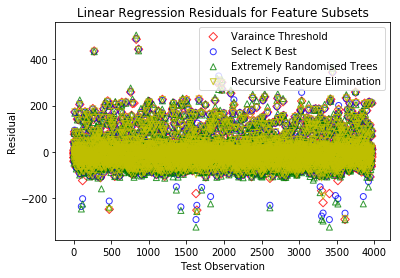

In [62]:
z = range(len(y_test))

plt.scatter(z, y_test - lr_vt.predict(X_test_vt), facecolors='none',\
            edgecolors='r',marker='D',alpha = 0.8, label='Varaince Threshold')
plt.scatter(z, y_test - lr_skb.predict(X_test_skb), facecolors='none',\
            edgecolors ='b', marker='o',alpha = 0.8, label='Select K Best')
plt.scatter(z, y_test - lr_etr.predict(X_test_etr), facecolors='none',\
            edgecolors='g', marker='^',alpha = 0.8, label='Extremely Randomised Trees')
plt.scatter(z, y_test - lr_rfe.predict(X_test_lr),facecolors='none',\
            edgecolors='y',marker='v',alpha = 0.8, label='Recursive Feature Elimination')
plt.legend()
plt.title('Linear Regression Residuals for Feature Subsets')
plt.xlabel('Test Observation')
plt.ylabel('Residual')
plt.show()


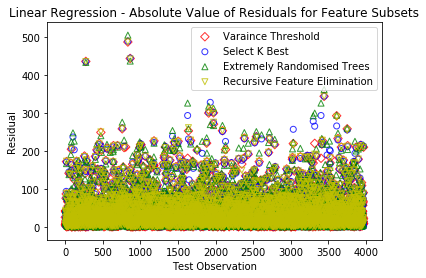

In [63]:
z = range(len(y_test))

plt.scatter(z, np.abs(y_test - lr_vt.predict(X_test_vt)), facecolors='none',\
            edgecolors='r',marker='D',alpha = 0.8, label='Varaince Threshold')
plt.scatter(z, np.abs(y_test - lr_skb.predict(X_test_skb)), facecolors='none',\
            edgecolors ='b', marker='o',alpha = 0.8, label='Select K Best')
plt.scatter(z, np.abs(y_test - lr_etr.predict(X_test_etr)), facecolors='none',\
            edgecolors='g', marker='^',alpha = 0.8, label='Extremely Randomised Trees')
plt.scatter(z, np.abs(y_test - lr_rfe.predict(X_test_lr)),facecolors='none',\
            edgecolors='y',marker='v',alpha = 0.8, label='Recursive Feature Elimination')
plt.legend()
plt.title('Linear Regression - Absolute Value of Residuals for Feature Subsets')
plt.xlabel('Test Observation')
plt.ylabel('Residual')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\residual_lr.pdf')
plt.show()

#  Support Vector Machine Regression

In [64]:
start=time.time()

#This section fits SVMR models to the feature subsets and makes predictions using the test set


print('Variance Threshold')
print()
print()

#p_grid={"base_estimator__kernel": ['rbf', 'poly'],  "base_estimator__epsilon": [0.1, 0.01,0.5,0.001], "base_estimator__C": [1,5,10,0.5,0.1],
        #"base_estimator__degree": [2,3,4,5]}

p_grid={"base_estimator__epsilon": [0.1, 0.01,0.5], "base_estimator__C": [1,5,10,0.5],}


'''
p_grid_rbf={ "base_estimator__epsilon": [0.1, 0.01,0.5], "base_estimator__C": [1,5,10]}
p_grid_poly={ "base_estimator__epsilon": [0.1, 0.01,0.5], "base_estimator__C": [1,5,10,],
        "base_estimator__degree": [2,3,4]}

p_grid={"base_estimator__epsilon": [0.1, 0.01,0.5,0.001], "base_estimator__C": [1,5,10,0.5,0.1],}

#bagging_svm = BaggingRegressor(LinearSVR(), n_estiamtors = 1000)


s1 = BaggingRegressor(SVR(kernel='rbf'))
s2 = BaggingRegressor(SVR(kernel='poly'))
clf_s1 = GridSearchCV(s1, param_grid=p_grid_rbf, cv=5)

clf_s2 = GridSearchCV(s2, param_grid=p_grid_poly, cv=5)

clf_s1.fit(X_train_vt, y_train)
clf_s2.fit(X_train_vt, y_train)
print("Mean Squared Error: ", mean_squared_error(y_test, clf_s1.predict(X_test_vt)))
print("Mean Squared Error: ", mean_squared_error(y_test, clf_s2.predict(X_test_vt)))


'''
bagging_svm = BaggingRegressor(LinearSVR(), n_jobs=-1, verbose = 2, random_state=2)

clf_vt = RandomizedSearchCV(bagging_svm, param_distributions=p_grid, cv=5, n_jobs=-1)

clf_vt.fit(X_train_vt, y_train)
print(clf_vt.best_params_)

clf_vt_model = BaggingRegressor(LinearSVR())
clf_vt_model.set_params(**clf_vt.best_params_)
clf_vt_model.fit(X_train_vt, y_train)


print("Mean Squared Error: ", mean_squared_error(y_test, clf_vt_model.predict(X_test_vt)))
print("R2: ", r2_score(y_test, clf_vt_model.predict(X_test_vt)))
print("Explained Variance: ", explained_variance_score(y_test, clf_vt_model.predict(X_test_vt)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, clf_vt_model.predict(X_test_vt)))

print()
print()

print('Select K Best')
print()
print()

#p_grid={"base_estimator__kernel": ['linear', 'rbf', 'poly'],  "base_estimator__epsilon": [0.1, 0.01,0.5,0.001], "base_estimator__C": [1,5,10,0.5,0.1],
#        "base_estimator__degree": [2,3,4,5]}

#bagging_svm = BaggingRegressor(LinearSVR())
bagging_svm = BaggingRegressor(LinearSVR(), n_jobs=-1, random_state=97)

clf_skb = RandomizedSearchCV(bagging_svm, param_distributions=p_grid, cv=5, n_jobs=-1)

clf_skb.fit(X_train_skb, y_train)
print(clf_skb.best_params_)


clf_skb_model = BaggingRegressor(LinearSVR())
clf_skb_model.set_params(**clf_skb.best_params_)
clf_skb_model.fit(X_train_skb, y_train)

print("Mean Squared Error: ", mean_squared_error(y_test, clf_skb_model.predict(X_test_skb)))
print("R2: ", r2_score(y_test, clf_skb_model.predict(X_test_skb)))
print("Explained Variance: ", explained_variance_score(y_test, clf_skb_model.predict(X_test_skb)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, clf_skb_model.predict(X_test_skb)))






print()
print()

print('Extremely Randomised Trees')
print()
print()

#p_grid={"base_estimator__kernel": ['linear', 'rbf', 'poly'],  "base_estimator__epsilon": [0.1, 0.01,0.5,0.001], "base_estimator__C": [1,5,10,0.5,0.1],
#        "base_estimator__degree": [2,3,4,5]}

#bagging_svm = BaggingRegressor(LinearSVR())
bagging_svm = BaggingRegressor(LinearSVR(), n_jobs=-1, random_state=57)

clf_etr = RandomizedSearchCV(bagging_svm, param_distributions=p_grid, cv=5, n_jobs=-1)

clf_etr.fit(X_train_etr, y_train)
print(clf_etr.best_params_)

clf_etr_model = BaggingRegressor(LinearSVR())
clf_etr_model.set_params(**clf_etr.best_params_)
clf_etr_model.fit(X_train_etr, y_train)

print("Mean Squared Error: ", mean_squared_error(y_test, clf_etr_model.predict(X_test_etr)))
print("R2: ", r2_score(y_test, clf_etr_model.predict(X_test_etr)))
print("Explained Variance: ", explained_variance_score(y_test, clf_etr_model.predict(X_test_etr)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, clf_etr_model.predict(X_test_etr)))

print()
print()

print('Recursive Feature Elimination')
print()
print()


X_train_svr = clf2.transform(X_train_std)# Transforming the training data for RFe with SVMR
svmr_rfe_model= clf2.best_estimator_.estimator_ #Initialising a SVMR with the best HPs determmined through cross validation

svmr_rfe_model.fit(X_train_svr, y_train)#Fit model with optimised HPs to RFE feature set


print("Mean Squared Error: ", mean_squared_error(y_test,svmr_rfe_model.predict(X_test_svr)))
print("R2: ", r2_score(y_test, svmr_rfe_model.predict(X_test_svr)))
print("Explained Variance: ", explained_variance_score(y_test, svmr_rfe_model.predict(X_test_svr)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, svmr_rfe_model.predict(X_test_svr)))
end = time.time()

print("Time Taken: ", end-start)
#'''

Variance Threshold




[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   13.9s remaining:   23.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.4s finished


{'base_estimator__epsilon': 0.01, 'base_estimator__C': 10}
Mean Squared Error:  4465.95938737
R2:  0.403704554649
Explained Variance:  0.446837100726
Mean Absolute Error:  38.7874635617


Select K Best


{'base_estimator__epsilon': 0.01, 'base_estimator__C': 10}
Mean Squared Error:  4592.66311556
R2:  0.386787057316
Explained Variance:  0.425302246432
Mean Absolute Error:  39.3594931955


Extremely Randomised Trees


{'base_estimator__epsilon': 0.01, 'base_estimator__C': 10}
Mean Squared Error:  4749.61952576
R2:  0.365830218168
Explained Variance:  0.405526872505
Mean Absolute Error:  40.6349689299


Recursive Feature Elimination


Mean Squared Error:  4442.50047341
R2:  0.406836791719
Explained Variance:  0.449836365065
Mean Absolute Error:  38.6476695229
Time Taken:  446.19769167900085


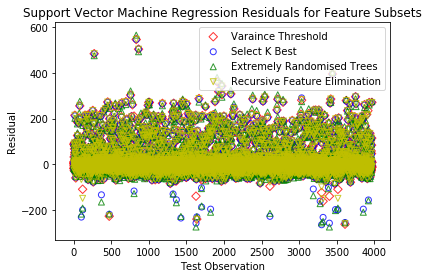

In [65]:
z = range(len(y_test))

plt.scatter(z, y_test - clf_vt_model.predict(X_test_vt),facecolors='none',\
            edgecolors='r',marker='D',alpha = 0.8, label='Varaince Threshold')
plt.scatter(z, y_test - clf_skb_model.predict(X_test_skb),facecolors='none',\
        edgecolors='b',marker='o',alpha = 0.8, label='Select K Best')
plt.scatter(z, y_test - clf_etr_model.predict(X_test_etr),facecolors='none',\
        edgecolors='g',marker='^',alpha = 0.8, label='Extremely Randomised Trees')
plt.scatter(z, y_test - svmr_rfe_model.predict(X_test_svr),facecolors='none',\
        edgecolors='y',marker='v',alpha = 0.8, label='Recursive Feature Elimination')
plt.legend()
plt.title('Support Vector Machine Regression Residuals for Feature Subsets')
plt.xlabel('Test Observation')
plt.ylabel('Residual')
#plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\residual_svmr.pdf')
plt.show()


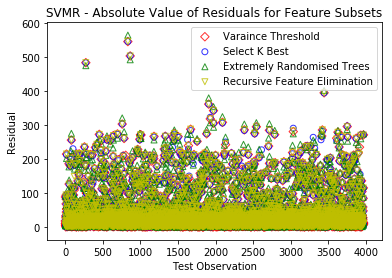

In [66]:


z = range(len(y_test))

plt.scatter(z, np.abs(y_test - clf_vt_model.predict(X_test_vt)),facecolors='none',\
            edgecolors='r',marker='D',alpha = 0.8, label='Varaince Threshold')
plt.scatter(z, np.abs(y_test - clf_skb_model.predict(X_test_skb)),facecolors='none',\
        edgecolors='b',marker='o',alpha = 0.8, label='Select K Best')
plt.scatter(z, np.abs(y_test - clf_etr_model.predict(X_test_etr)),facecolors='none',\
        edgecolors='g',marker='^',alpha = 0.8, label='Extremely Randomised Trees')
plt.scatter(z, np.abs(y_test - svmr_rfe_model.predict(X_test_svr)),facecolors='none',\
        edgecolors='y',marker='v',alpha = 0.8, label='Recursive Feature Elimination')
plt.legend()
plt.title('SVMR - Absolute Value of Residuals for Feature Subsets')
plt.xlabel('Test Observation')
plt.ylabel('Residual')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\residual_svmr.pdf')
plt.show()


# Random Forest

In [67]:
start=time.time()

#This section fits RF models to the feature subsets and makes predictions using the test set


p_grid3 =  {'n_estimators': [10, 50, 100, 200], 'criterion': ['mse', 'mae'],
           'max_features': [0.1,0.25,0.5, 0.7]} #Inialise the HP grid for Random Forest models


print('Variance Threshold')
print()
print()


rf_vt = RandomForestRegressor(random_state=18, n_jobs=-1) #Initalsie a Random Forest model
clf_vt_rf = RandomizedSearchCV(rf_vt, param_distributions=p_grid3, random_state=23) #Create a RSCV object on a RF model
clf_vt_rf.fit(X_train_vt, y_train) #fit RSCV model to VT feature set training data 
print(clf_vt_rf.best_params_) #Optimised HPs for VT and RF model 

clf_vt_rf_model = RandomForestRegressor(**clf_vt_rf.best_params_) #Initilaising model with optimised  hyper-params
clf_vt_rf_model.fit(X_train_vt, y_train) #Fit model with optimised params to training data 

#Print the performance metrics
print("Mean Squared Error: ", mean_squared_error(y_test, clf_vt_rf_model.predict(X_test_vt)))
print("R2: ", r2_score(y_test, clf_vt_rf_model.predict(X_test_vt)))
print("Explained Variance: ", explained_variance_score(y_test, clf_vt_rf_model.predict(X_test_vt)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, clf_vt_rf_model.predict(X_test_vt)))


print()
print()

print('Select K Best')
print()
print()


rf_skb = RandomForestRegressor(random_state=38, n_jobs=-1)
clf_skb_rf = RandomizedSearchCV(rf_skb, param_distributions=p_grid3, random_state=76)
clf_skb_rf.fit(X_train_skb, y_train)
print(clf_skb_rf.best_params_)


clf_skb_rf_model = RandomForestRegressor(**clf_skb_rf.best_params_)
clf_skb_rf_model.fit(X_train_skb, y_train)

print("Mean Squared Error: ", mean_squared_error(y_test, clf_skb_rf_model.predict(X_test_skb)))
print("R2: ", r2_score(y_test, clf_skb_rf_model.predict(X_test_skb)))
print("Explained Variance: ", explained_variance_score(y_test, clf_skb_rf_model.predict(X_test_skb)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, clf_skb_rf_model.predict(X_test_skb)))


print()
print()

print('Extremely Randomised Trees')
print()
print()


rf_etr = RandomForestRegressor(random_state=83, n_jobs=-1) #Initialise a RF model
clf_etr_rf = RandomizedSearchCV(rf_etr, param_distributions=p_grid3, random_state=49)
clf_etr_rf.fit(X_train_etr, y_train)
print(clf_etr_rf.best_params_)

clf_etr_rf_model = RandomForestRegressor(**clf_etr_rf.best_params_)
clf_etr_rf_model.fit(X_train_etr, y_train)

print("Mean Squared Error: ", mean_squared_error(y_test, clf_etr_rf_model.predict(X_test_etr)))
print("R2: ", r2_score(y_test, clf_etr_rf_model.predict(X_test_etr)))
print("Explained Variance: ", explained_variance_score(y_test, clf_etr_rf_model.predict(X_test_etr)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, clf_etr_rf_model.predict(X_test_etr)))

print()
print()

print('Recursive Feature Elimination')
print()
print()


X_train_rf = clf3.transform(X_train_std)#transform training data to remove non-important features
rf_rfe_model= clf3.best_estimator_.estimator_ #Initialise the RF with the best HP selected via RFE

rf_rfe_model.fit(X_train_rf, y_train)#Fit model with best hyper-parameters to the traning data


print("Mean Squared Error: ", mean_squared_error(y_test,rf_rfe_model.predict(X_test_rf)))
print("R2: ", r2_score(y_test, rf_rfe_model.predict(X_test_rf)))
print("Explained Variance: ", explained_variance_score(y_test, rf_rfe_model.predict(X_test_rf)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_rfe_model.predict(X_test_rf)))

end=time.time()

print("Time Taken: ", end-start)

Variance Threshold


{'n_estimators': 100, 'max_features': 0.5, 'criterion': 'mse'}
Mean Squared Error:  98.0421113327
R2:  0.986909405266
Explained Variance:  0.986909919242
Mean Absolute Error:  1.86058556719


Select K Best


{'n_estimators': 100, 'max_features': 0.7, 'criterion': 'mse'}
Mean Squared Error:  121.966797242
R2:  0.983714978268
Explained Variance:  0.983715585438
Mean Absolute Error:  1.77793787932


Extremely Randomised Trees


{'n_estimators': 200, 'max_features': 0.7, 'criterion': 'mse'}
Mean Squared Error:  225.189344505
R2:  0.969932691092
Explained Variance:  0.969933467558
Mean Absolute Error:  2.52735107672


Recursive Feature Elimination


Mean Squared Error:  90.4988355049
R2:  0.98791658438
Explained Variance:  0.987917895779
Mean Absolute Error:  1.69858205593
Time Taken:  3472.7054340839386


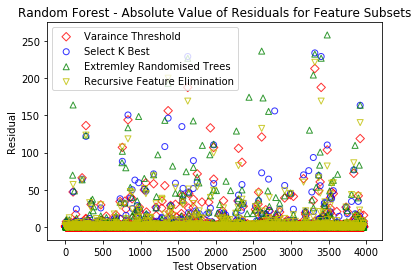

In [68]:
z = range(len(y_test))
#plt.figure(figsize=(7,7))
plt.scatter(z, np.abs(y_test - clf_vt_rf_model.predict(X_test_vt)),facecolors='none',\
            edgecolors='r',marker='D',alpha = 0.8, label='Varaince Threshold')
plt.scatter(z, np.abs(y_test - clf_skb_rf_model.predict(X_test_skb)),facecolors='none',\
            edgecolors ='b',marker='o',alpha = 0.8, label='Select K Best')
plt.scatter(z, np.abs(y_test - clf_etr_rf_model.predict(X_test_etr)), facecolors='none',
            edgecolors='g',marker='^',alpha = 0.8, label = 'Extremley Randomised Trees')
plt.scatter(z, np.abs(y_test - rf_rfe_model.predict(X_test_rf)),facecolors='none',\
        edgecolors='y',marker='v',alpha = 0.8, label='Recursive Feature Elimination')
plt.legend()
plt.title('Random Forest - Absolute Value of Residuals for Feature Subsets')
plt.xlabel('Test Observation')
plt.ylabel('Residual')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\residual_rf.pdf')
plt.show()

#  Neural Networks

In [87]:
import warnings
warnings.filterwarnings('ignore') #This was included to pevent the printing hundreds of convergence warnings if
#one changes the nummber of iterations parameter below 

#If one wishes to speed up this piece of code, change the max_iter parameter to a smaller number
# though this will change the results of the model. 

#This section fits NN models to the feature subsets and makes predictions using the test set

start = time.time()
print('Variance Threshold')
print()
print()

p_grid={"hidden_layer_sizes": [(20,5), (20,30,10), (100, 50,10),(50, 50,50),   (100,20, 10, 3),(50), (28, 28, 28)],
        "activation": ['identity', 'relu', 'tanh', 'logistic']}#Initialise Parameter Grid 

nn_vt = MLPRegressor(random_state=125, max_iter=2000)#Initilaise NN model
clf_vt_nn = RandomizedSearchCV(nn_vt, param_distributions=p_grid,  random_state=11,  n_jobs=2, n_iter=15)#Initialise RSCV object
clf_vt_nn.fit(X_train_vt, y_train)#Fit RSCV object to VT Feature set
print(clf_vt_nn.best_params_)

clf_vt_nn_model=MLPRegressor(**clf_vt_nn.best_params_)
clf_vt_nn_model.fit(X_train_vt, y_train)


print("Mean Squared Error: ", mean_squared_error(y_test, clf_vt_nn_model.predict(X_test_vt)))
print("R2: ", r2_score(y_test, clf_vt_nn_model.predict(X_test_vt)))
print("Explained Variance: ", explained_variance_score(y_test, clf_vt_nn_model.predict(X_test_vt)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, clf_vt_nn_model.predict(X_test_vt)))

print()
print()

print('Select K Best')
print()
print()

p_grid={"hidden_layer_sizes": [(20,5), (20,30,10), (100, 50,10),(50, 50,50),   (100,20, 10, 3),(50), (28, 28, 28)],
        "activation": ['identity', 'relu', 'tanh', 'logistic']}#Initialise Parameter Grid

nn_skb = MLPRegressor(random_state=42, max_iter=2000) #Initilaise NN model
clf_skb_nn  = RandomizedSearchCV(nn_skb, param_distributions=p_grid, random_state=53,  n_jobs=2, n_iter=15)#Initialise RSCV object
clf_skb_nn.fit(X_train_skb, y_train)#Fit RSCV object to SKB Feature set
print(clf_skb_nn.best_params_)

clf_skb_nn_model=MLPRegressor(**clf_skb_nn.best_params_)
clf_skb_nn_model.fit(X_train_skb, y_train)


print("Mean Squared Error: ", mean_squared_error(y_test, clf_skb_nn_model.predict(X_test_skb)))
print("R2: ", r2_score(y_test, clf_skb_nn_model.predict(X_test_skb)))
print("Explained Variance: ", explained_variance_score(y_test, clf_skb_nn_model.predict(X_test_skb)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, clf_skb_nn_model.predict(X_test_skb)))


print()
print()

print('Extremely Randomised Trees')
print()
print()

p_grid={"hidden_layer_sizes": [(20,5), (20,30,10), (100, 50,10),(50, 50,50),  (100,20, 10, 3),(50), (28, 28, 28)],
        "activation": ['identity', 'relu', 'tanh', 'logistic']}#Initialise Parameter Grid

nn_etr = MLPRegressor(random_state=48, max_iter=2000) #Initilaise NN model
clf_etr_nn  = RandomizedSearchCV(nn_etr, param_distributions=p_grid, random_state=76, n_jobs=2, n_iter=15)#Initialise RSCV object
clf_etr_nn.fit(X_train_etr, y_train) #Fit RSCV object to ERT Feature set
print(clf_etr_nn.best_params_)

clf_etr_nn_model=MLPRegressor(**clf_etr_nn.best_params_)
clf_etr_nn_model.fit(X_train_etr, y_train)



print("Mean Squared Error: ", mean_squared_error(y_test,  clf_etr_nn_model.predict(X_test_etr)))
print("R2: ", r2_score(y_test, clf_etr_nn_model.predict(X_test_etr)))
print("Explained Variance: ", explained_variance_score(y_test, clf_etr_nn_model.predict(X_test_etr)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, clf_etr_nn_model.predict(X_test_etr)))
end=time.time()

print("Time Taken: ", end-start)

Variance Threshold


{'hidden_layer_sizes': (100, 20, 10, 3), 'activation': 'relu'}
Mean Squared Error:  177.603257651
R2:  0.976286391247
Explained Variance:  0.977296703693
Mean Absolute Error:  7.37702356767


Select K Best


{'hidden_layer_sizes': (50, 50, 50), 'activation': 'tanh'}
Mean Squared Error:  213.460556439
R2:  0.971498720314
Explained Variance:  0.971511585872
Mean Absolute Error:  5.07157815033


Extremely Randomised Trees


{'hidden_layer_sizes': (50, 50, 50), 'activation': 'tanh'}
Mean Squared Error:  287.224511143
R2:  0.961649748031
Explained Variance:  0.962044471262
Mean Absolute Error:  5.56519771414
Time Taken:  2705.098635196686


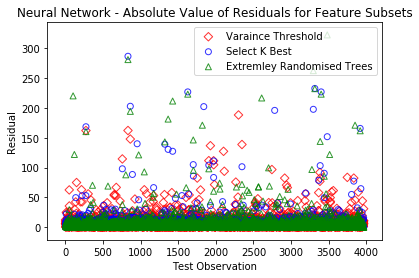

In [88]:
z = range(len(y_test))
#plt.figure(figsize=(7,7))
plt.scatter(z, np.abs(y_test - clf_vt_nn_model.predict(X_test_vt)),facecolors='none',\
            edgecolors='r',marker='D',alpha = 0.8, label='Varaince Threshold')
plt.scatter(z, np.abs(y_test - clf_skb_nn_model.predict(X_test_skb)),facecolors='none',\
            edgecolors ='b',marker='o',alpha = 0.8, label='Select K Best')
plt.scatter(z, np.abs(y_test - clf_etr_nn_model.predict(X_test_etr)), facecolors='none',
            edgecolors='g',marker='^',alpha = 0.8, label = 'Extremley Randomised Trees')
plt.legend()
plt.title('Neural Network - Absolute Value of Residuals for Feature Subsets')
plt.xlabel('Test Observation')
plt.ylabel('Residual')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\residual_nn.pdf')
plt.show()

# Table of Metrics

In [89]:
#Forming the table of metrics which can be automatically uploaded to Latex

metric_matrix=np.empty((15, 4))

metric_matrix[0,0]= mean_squared_error(y_test, lr_vt.predict(X_test_vt))
metric_matrix[0,1]= r2_score(y_test, lr_vt.predict(X_test_vt))
metric_matrix[0,2]= explained_variance_score(y_test, lr_vt.predict(X_test_vt))
metric_matrix[0,3] = mean_absolute_error(y_test, lr_vt.predict(X_test_vt))


metric_matrix[1,0]=mean_squared_error(y_test, lr_skb.predict(X_test_skb))
metric_matrix[1,1]=r2_score(y_test, lr_skb.predict(X_test_skb))
metric_matrix[1,2]=explained_variance_score(y_test, lr_skb.predict(X_test_skb))
metric_matrix[1,3] = mean_absolute_error(y_test, lr_skb.predict(X_test_skb))

metric_matrix[2,0]=mean_squared_error(y_test, lr_etr.predict(X_test_etr))
metric_matrix[2,1]=r2_score(y_test, lr_etr.predict(X_test_etr))
metric_matrix[2,2]=explained_variance_score(y_test, lr_etr.predict(X_test_etr))
metric_matrix[2,3] = mean_absolute_error(y_test, lr_etr.predict(X_test_etr))

metric_matrix[3,0]=mean_squared_error(y_test, lr_rfe_std.predict(X_test_lr_std))
metric_matrix[3,1]=r2_score(y_test, lr_rfe_std.predict(X_test_lr_std))
metric_matrix[3,2]=explained_variance_score(y_test, lr_rfe_std.predict(X_test_lr_std))
metric_matrix[3,3] = mean_absolute_error(y_test, lr_rfe_std.predict(X_test_lr_std))

metric_matrix[4,0]=mean_squared_error(y_test, clf_vt_model.predict(X_test_vt))
metric_matrix[4,1]=r2_score(y_test, clf_vt_model.predict(X_test_vt))
metric_matrix[4,2]=explained_variance_score(y_test, clf_vt_model.predict(X_test_vt))
metric_matrix[4,3] = mean_absolute_error(y_test, clf_vt_model.predict(X_test_vt))
                                      
metric_matrix[5,0]=mean_squared_error(y_test, clf_skb_model.predict(X_test_skb))
metric_matrix[5,1]=r2_score(y_test, clf_skb_model.predict(X_test_skb))
metric_matrix[5,2]=explained_variance_score(y_test, clf_skb_model.predict(X_test_skb))
metric_matrix[5,3] = mean_absolute_error(y_test, clf_skb_model.predict(X_test_skb))
                                      
metric_matrix[6,0]=mean_squared_error(y_test, clf_etr_model.predict(X_test_etr))
metric_matrix[6,1]=r2_score(y_test, clf_etr_model.predict(X_test_etr))
metric_matrix[6,2]=explained_variance_score(y_test, clf_etr_model.predict(X_test_etr))
metric_matrix[6,3] = mean_absolute_error(y_test, clf_etr_model.predict(X_test_etr))
                                      
metric_matrix[7,0]=mean_squared_error(y_test,svmr_rfe_model.predict(X_test_svr))
metric_matrix[7,1]=r2_score(y_test,svmr_rfe_model.predict(X_test_svr))
metric_matrix[7,2]=explained_variance_score(y_test,svmr_rfe_model.predict(X_test_svr))
metric_matrix[7,3] = mean_absolute_error(y_test, svmr_rfe_model.predict(X_test_svr))
                                            
metric_matrix[8,0]= mean_squared_error(y_test, clf_vt_rf_model.predict(X_test_vt))
metric_matrix[8,1]= r2_score(y_test, clf_vt_rf_model.predict(X_test_vt))
metric_matrix[8,2]= explained_variance_score(y_test, clf_vt_rf_model.predict(X_test_vt))
metric_matrix[8,3]= mean_absolute_error(y_test, clf_vt_rf_model.predict(X_test_vt))

metric_matrix[9,0]= mean_squared_error(y_test, clf_skb_rf_model.predict(X_test_skb))
metric_matrix[9,1]= r2_score(y_test, clf_skb_rf_model.predict(X_test_skb))
metric_matrix[9,2]= explained_variance_score(y_test, clf_skb_rf_model.predict(X_test_skb))
metric_matrix[9,3]= mean_absolute_error(y_test, clf_skb_rf_model.predict(X_test_skb))

metric_matrix[10,0]= mean_squared_error(y_test, clf_etr_rf_model.predict(X_test_etr))
metric_matrix[10,1]= r2_score(y_test, clf_etr_rf_model.predict(X_test_etr))
metric_matrix[10,2]= explained_variance_score(y_test, clf_etr_rf_model.predict(X_test_etr))
metric_matrix[10,3]= mean_absolute_error(y_test, clf_etr_rf_model.predict(X_test_etr))

metric_matrix[11,0]= mean_squared_error(y_test, rf_rfe_model.predict(X_test_rf))
metric_matrix[11,1]= r2_score(y_test, rf_rfe_model.predict(X_test_rf))
metric_matrix[11,2]= explained_variance_score(y_test, rf_rfe_model.predict(X_test_rf))
metric_matrix[11,3]= mean_absolute_error(y_test, rf_rfe_model.predict(X_test_rf))


metric_matrix[12,0]=  mean_squared_error(y_test, clf_vt_nn_model.predict(X_test_vt))
metric_matrix[12,1]=  r2_score(y_test, clf_vt_nn_model.predict(X_test_vt))
metric_matrix[12,2]=  explained_variance_score(y_test, clf_vt_nn_model.predict(X_test_vt))
metric_matrix[12,3]=  mean_absolute_error(y_test, clf_vt_nn_model.predict(X_test_vt))

                                            
metric_matrix[13,0]=  mean_squared_error(y_test, clf_skb_nn_model.predict(X_test_skb))
metric_matrix[13,1]=  r2_score(y_test, clf_skb_nn_model.predict(X_test_skb))
metric_matrix[13,2]=  explained_variance_score(y_test, clf_skb_nn_model.predict(X_test_skb))
metric_matrix[13,3]=  mean_absolute_error(y_test, clf_skb_nn_model.predict(X_test_skb))

                                            
metric_matrix[14,0]= mean_squared_error(y_test, clf_etr_nn_model.predict(X_test_etr))
metric_matrix[14,1]= r2_score(y_test, clf_etr_nn_model.predict(X_test_etr))
metric_matrix[14,2]= explained_variance_score(y_test, clf_etr_nn_model.predict(X_test_etr))
metric_matrix[14,3]= mean_absolute_error(y_test, clf_etr_nn_model.predict(X_test_etr))



print(metric_matrix)


[[  3.72640792e+03   5.02449558e-01   5.02471780e-01   4.28046995e+01]
 [  3.85928351e+03   4.84707993e-01   4.84746624e-01   4.33257787e+01]
 [  4.08162999e+03   4.55020263e-01   4.55058340e-01   4.43077818e+01]
 [  3.70018204e+03   5.05951240e-01   5.05977140e-01   4.27424227e+01]
 [  4.46595939e+03   4.03704555e-01   4.46837101e-01   3.87874636e+01]
 [  4.59266312e+03   3.86787057e-01   4.25302246e-01   3.93594932e+01]
 [  4.74961953e+03   3.65830218e-01   4.05526873e-01   4.06349689e+01]
 [  4.44250047e+03   4.06836792e-01   4.49836365e-01   3.86476695e+01]
 [  9.80421113e+01   9.86909405e-01   9.86909919e-01   1.86058557e+00]
 [  1.21966797e+02   9.83714978e-01   9.83715585e-01   1.77793788e+00]
 [  2.25189345e+02   9.69932691e-01   9.69933468e-01   2.52735108e+00]
 [  9.04988355e+01   9.87916584e-01   9.87917896e-01   1.69858206e+00]
 [  1.77603258e+02   9.76286391e-01   9.77296704e-01   7.37702357e+00]
 [  2.13460556e+02   9.71498720e-01   9.71511586e-01   5.07157815e+00]
 [  2.

In [90]:
metric_matrix = pd.DataFrame(metric_matrix)


mm_columns = ['MSE','$R^{2}$', 'EVS', 'MAE']
mm_index = ['LR with $\textbf{X}^{var}$', 'LR with $\textbf{X}^{mi}$',\
                      'LR with $\textbf{X}^{etr}$', 'LR with $\textbf{X}^{LR}$',\
                      'SVMR with  $\textbf{X}^{var}$', 'SVMR with  $\textbf{X}^{mi}$',\
                      'SVMR with $\textbf{X}^{etr}$', 'SVMR with  $\textbf{X}^{SVMR}$',\
                   'RF with $\textbf{X}^{var}$', 'RF with $\textbf{X}^{mi}$',\
            'RF with $\textbf{X}^{etr}$', 'RF with $\textbf{X}^{RF}$',\
            'NN with $\textbf{X}^{var}$', 'NN with $\textbf{X}^{mi}$', 'NN with $\textbf{X}^{etr}$']

metric_matrix.index = mm_index


In [91]:

print(metric_matrix.index)
print(metric_matrix.columns)

Index(['LR with $\textbf{X}^{var}$', 'LR with $\textbf{X}^{mi}$',
       'LR with $\textbf{X}^{etr}$', 'LR with $\textbf{X}^{LR}$',
       'SVMR with  $\textbf{X}^{var}$', 'SVMR with  $\textbf{X}^{mi}$',
       'SVMR with $\textbf{X}^{etr}$', 'SVMR with  $\textbf{X}^{SVMR}$',
       'RF with $\textbf{X}^{var}$', 'RF with $\textbf{X}^{mi}$',
       'RF with $\textbf{X}^{etr}$', 'RF with $\textbf{X}^{RF}$',
       'NN with $\textbf{X}^{var}$', 'NN with $\textbf{X}^{mi}$',
       'NN with $\textbf{X}^{etr}$'],
      dtype='object')
RangeIndex(start=0, stop=4, step=1)


In [92]:
metric_matrix.to_latex('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\metric_matrix.tex', bold_rows=False,\
                       header=mm_columns, column_format ='|l|c|c|c|c|', escape=False )

In [93]:
end1 = time.time()

print("Total Time taken for Project = ", end1-start1) #To anlalyse total running time


Total Time taken for Project =  21266.078038454056


# The Final Model

In [76]:
# Saving The Feature Selection Method


joblib.dump( sfm,'feature_selection_etr.pkl' )
joblib.dump( clf3,'model_rfe.pkl' )
fs_etr = joblib.load('feature_selection_etr.pkl')

In [77]:
#Saving the Prediction model -RF
joblib.dump(clf_etr_rf , 'model_etr.pkl' )
model_etr = joblib.load('model_etr.pkl')
model_rf = joblib.load('model_rfe.pkl')



In [78]:
#Saving the Prediction model - NN
#joblib.dump(clf_etr_nn , 'model_etr_nn.pkl' )
#model_nn = joblib.load('feature_selection_model_etr_nn.pkl')


# No Claims Results

This Section covers only the generation of the results and figure seen in the conclusions chapter.

This can be run at any other time as it is not depended upon any of the precedding code.

In [79]:
df_nc = pd.read_excel('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Data\\final_data\\final_combined_test_long_lat.xlsx')

x = ['Occupied During The Day', 'Business Use', 'Lodgers', 'Subsidence',
       'Working Smoke Alarm', 'Cover Outside Home', 'Flat Roof',
       'Include Buildings', 'Include Contents', 'Accidental Damage Cover',
       'Accidental Damage Contents', 'Have Buildings Claims',
       'Have Made Content Claims', 'Monitored Alarm']


for i, word in enumerate(x):
    df_nc[str(word)] = df_nc[str(word)].eq('Checked').mul(1)

df_nc = df_nc.drop(['Last Updated', 'Name', 'Post Code', 'Area Band Contents'], axis=1)
print(df_nc.columns)
print(len(df_nc.columns))
df_nc = df_nc[df_nc['Property Type'] != 'Semi-Detached']
df_nc = df_nc[df_nc['Marital Status'] != 'Co-Habitating']


cols_to_transfrom = ['Marital Status', 'Property Type', 'Ownership','Main Entrance Door Locks']
df_nc = pd.get_dummies(df_nc, columns= cols_to_transfrom)

df_nc = df_nc[df_nc['Have Buildings Claims'] == 0]
df_nc = df_nc[df_nc['Have Made Content Claims'] == 0]

y_nc = df_nc['UKGQuote']
y_nc=pd.Series(y_nc)
df_nc=df_nc.drop(['UKGQuote'], axis=1)

Index(['latitude', 'longitude', 'Bedrooms', 'Age', 'Marital Status',
       'Property Type', 'Property Age', 'Ownership', 'Voluntary Excess',
       'Occupied During The Day', 'Business Use', 'Lodgers', 'Subsidence',
       'Working Smoke Alarm', 'Cover Outside Home', 'Flat Roof',
       'Include Buildings', 'Include Contents', 'Accidental Damage Cover',
       'Accidental Damage Contents', 'Have Buildings Claims',
       'Have Made Content Claims',
       'How Long Have You Held Buildings Insurance',
       'How Long Have You Held Contents Insurance', 'Main Entrance Door Locks',
       'Monitored Alarm', 'Number Of Claims Previous 12months',
       'Number Of Claims 13to 24months', 'Number Of Claims 25to 36 Months',
       'Number Of Claims 37to 48 Months', 'Number Of Claims 49to 60 Months',
       'Number Of Content Claims Previous 12months',
       'Number Of Content Claims 13to 24months',
       'Number Of Content Claims 25to 36 Months',
       'Number Of Content Claims 37to 48 Mon

In [80]:
X_nc = df_nc.as_matrix()

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_nc, y_nc, test_size=0.15, random_state=42)


scaler=StandardScaler()

X_train_std_nc = scaler.fit_transform(X_train_nc)

X_test_std_nc = scaler.transform(X_test_nc)

Feature Selection Methods

In [81]:
#Variance Threshold
thresh_nc = VarianceThreshold(threshold=0.05)
vt_nc = thresh_nc.fit(X_train_nc)
X_train_vt_nc = thresh_nc.fit_transform(X_train_nc) #Fitting and transforming unscaled data
X_test_vt_nc = thresh_nc.transform(X_test_nc)

scaler_nc=StandardScaler()
X_train_vt_nc = scaler_nc.fit_transform(X_train_vt_nc) #Scaling the VT feature set
X_test_vt_nc  = scaler_nc.transform(X_test_vt_nc)



#Select K Best

skb_nc=SelectKBest(mutual_info_regression, k =30)
X_train_skb_nc = skb_nc.fit_transform(X_train_std_nc, y_train_nc) #Performing Feature Selection 
X_test_skb_nc = skb_nc.transform(X_test_std_nc)


#ERT

model_nc = ExtraTreesRegressor(random_state=23)
model_nc.fit(X_train_std_nc, y_train_nc)

sfm=SelectFromModel(ExtraTreesRegressor(random_state=23), threshold=0.01)
X_train_etr_nc = sfm.fit_transform(X_train_std_nc, y_train_nc)
X_test_etr_nc = sfm.transform(X_test_std_nc)

#RFE


p_grid3 =  {'estimator__n_estimators': [ 20, 50, 100],'estimator__max_features': [0.1,0.25,0.5,0.7]}
inner_cv = KFold(n_splits=4, shuffle=True, random_state=39)
estimator_nc = RandomForestRegressor( n_jobs=-1, random_state=64)
selector_nc = RFECV(estimator_nc,step=1, cv=inner_cv, n_jobs=-1)
clf3_nc = RandomizedSearchCV(selector_nc, param_distributions=p_grid3, cv=3, random_state=89, verbose = 2, n_jobs=-1)

clf3_nc.fit(X_train_std_nc, y_train_nc)
X_test_rf_nc = clf3_nc.transform(X_test_std_nc)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.4min finished


In [82]:
p_grid3 =  {'n_estimators': [10,20, 50, 100], 'criterion': ['mse', 'mae'],
           'max_features': [0.1,0.25,0.5, 0.7]}




print('Variance Threshold')
print()
print()


rf_vt_nc = RandomForestRegressor(random_state=18, n_jobs=-1)
clf_vt_rf_nc = RandomizedSearchCV(rf_vt_nc, param_distributions=p_grid3, random_state=23)
clf_vt_rf_nc.fit(X_train_vt_nc, y_train_nc)
print(clf_vt_rf_nc.best_params_)

clf_vt_rf_nc_model = RandomForestRegressor(**clf_vt_rf_nc.best_params_)
clf_vt_rf_nc_model.fit(X_train_vt_nc, y_train_nc)

print("Mean Squared Error: ", mean_squared_error(y_test_nc, clf_vt_rf_nc_model.predict(X_test_vt_nc)))
print("R2: ", r2_score(y_test_nc, clf_vt_rf_nc_model.predict(X_test_vt_nc)))
print("Explained Variance: ", explained_variance_score(y_test_nc, clf_vt_rf_nc_model.predict(X_test_vt_nc)))
print("Mean Absolute Error: ", mean_absolute_error(y_test_nc, clf_vt_rf_nc_model.predict(X_test_vt_nc)))


print()
print()

print('Select K Best')
print()
print()


rf_skb_nc = RandomForestRegressor(random_state=38, n_jobs=-1)
clf_skb_rf_nc = RandomizedSearchCV(rf_skb_nc, param_distributions=p_grid3, random_state=76)
clf_skb_rf_nc.fit(X_train_skb_nc, y_train_nc)
print(clf_skb_rf_nc.best_params_)

clf_skb_rf_nc_model = RandomForestRegressor(**clf_skb_rf_nc.best_params_)
clf_skb_rf_nc_model.fit(X_train_skb_nc, y_train_nc)

print("Mean Squared Error: ", mean_squared_error(y_test_nc, clf_skb_rf_nc_model.predict(X_test_skb_nc)))
print("R2: ", r2_score(y_test_nc, clf_skb_rf_nc_model.predict(X_test_skb_nc)))
print("Explained Variance: ", explained_variance_score(y_test_nc, clf_skb_rf_nc_model.predict(X_test_skb_nc)))
print("Mean Absolute Error: ", mean_absolute_error(y_test_nc, clf_skb_rf_nc_model.predict(X_test_skb_nc)))


print()
print()

print('Extremely Randomised Trees')
print()
print()


rf_etr_nc = RandomForestRegressor(random_state=83, n_jobs=-1)
clf_etr_rf_nc = RandomizedSearchCV(rf_etr_nc, param_distributions=p_grid3, random_state=49)
clf_etr_rf_nc.fit(X_train_etr_nc, y_train_nc)
print(clf_etr_rf_nc.best_params_)

clf_etr_rf_nc_model = RandomForestRegressor(**clf_etr_rf_nc.best_params_)
clf_etr_rf_nc_model.fit(X_train_etr_nc, y_train_nc)

print("Mean Squared Error: ", mean_squared_error(y_test_nc, clf_etr_rf_nc_model.predict(X_test_etr_nc)))
print("R2: ", r2_score(y_test_nc, clf_etr_rf_nc_model.predict(X_test_etr_nc)))
print("Explained Variance: ", explained_variance_score(y_test_nc, clf_etr_rf_nc_model.predict(X_test_etr_nc)))
print("Mean Absolute Error: ", mean_absolute_error(y_test_nc, clf_etr_rf_nc_model.predict(X_test_etr_nc)))

print()
print()

print('Recursive Feature Elimination')
print()
print()


X_train_rf_nc = clf3_nc.transform(X_train_std_nc)
rf_rfe_nc_model= clf3_nc.best_estimator_.estimator_

rf_rfe_nc_model.fit(X_train_rf_nc, y_train_nc)


print("Mean Squared Error: ", mean_squared_error(y_test_nc,rf_rfe_nc_model.predict(X_test_rf_nc)))
print("R2: ", r2_score(y_test_nc, rf_rfe_nc_model.predict(X_test_rf_nc)))
print("Explained Variance: ", explained_variance_score(y_test_nc, rf_rfe_nc_model.predict(X_test_rf_nc)))
print("Mean Absolute Error: ", mean_absolute_error(y_test_nc, rf_rfe_nc_model.predict(X_test_rf_nc)))


Variance Threshold


{'n_estimators': 50, 'max_features': 0.5, 'criterion': 'mse'}
Mean Squared Error:  41.5445535668
R2:  0.994312881582
Explained Variance:  0.994313837071
Mean Absolute Error:  1.36309886109


Select K Best


{'n_estimators': 50, 'max_features': 0.7, 'criterion': 'mse'}
Mean Squared Error:  38.0935281987
R2:  0.994785299462
Explained Variance:  0.994789803901
Mean Absolute Error:  1.18578281532


Extremely Randomised Trees


{'n_estimators': 100, 'max_features': 0.7, 'criterion': 'mse'}
Mean Squared Error:  38.1072122261
R2:  0.994783426228
Explained Variance:  0.994786494982
Mean Absolute Error:  1.0227231042


Recursive Feature Elimination


Mean Squared Error:  37.7996527128
R2:  0.994825528675
Explained Variance:  0.994829998909
Mean Absolute Error:  1.02484230769


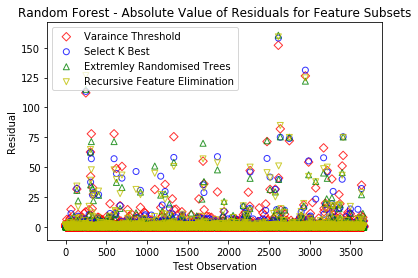

In [83]:
z = range(len(y_test_nc))
#plt.figure(figsize=(7,7))
plt.scatter(z, np.abs(y_test_nc - clf_vt_rf_nc_model.predict(X_test_vt_nc)),facecolors='none',\
            edgecolors='r',marker='D',alpha = 0.8, label='Varaince Threshold')
plt.scatter(z, np.abs(y_test_nc - clf_skb_rf_nc_model.predict(X_test_skb_nc)),facecolors='none',\
            edgecolors ='b',marker='o',alpha = 0.8, label='Select K Best')
plt.scatter(z, np.abs(y_test_nc - clf_etr_rf_nc_model.predict(X_test_etr_nc)), facecolors='none',
            edgecolors='g',marker='^',alpha = 0.8, label = 'Extremley Randomised Trees')
plt.scatter(z, np.abs(y_test_nc - rf_rfe_nc_model.predict(X_test_rf_nc)),facecolors='none',\
        edgecolors='y',marker='v',alpha = 0.8, label='Recursive Feature Elimination')
plt.legend()
plt.title('Random Forest - Absolute Value of Residuals for Feature Subsets')
plt.xlabel('Test Observation')
plt.ylabel('Residual')
plt.savefig('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\Images\\data\\residual_rf_no_claims.pdf')
plt.show()

In [84]:

metric_matrix_nc=np.empty((4, 4))


                                            
metric_matrix_nc[0,0]= mean_squared_error(y_test_nc, clf_vt_rf_nc_model.predict(X_test_vt_nc))
metric_matrix_nc[0,1]= r2_score(y_test_nc, clf_vt_rf_nc_model.predict(X_test_vt_nc))
metric_matrix_nc[0,2]= explained_variance_score(y_test_nc, clf_vt_rf_nc_model.predict(X_test_vt_nc))
metric_matrix_nc[0,3]= mean_absolute_error(y_test_nc, clf_vt_rf_nc_model.predict(X_test_vt_nc))

metric_matrix_nc[1,0]= mean_squared_error(y_test_nc, clf_skb_rf_nc_model.predict(X_test_skb_nc))
metric_matrix_nc[1,1]= r2_score(y_test_nc, clf_skb_rf_nc_model.predict(X_test_skb_nc))
metric_matrix_nc[1,2]= explained_variance_score(y_test_nc, clf_skb_rf_nc_model.predict(X_test_skb_nc))
metric_matrix_nc[1,3]= mean_absolute_error(y_test_nc, clf_skb_rf_nc_model.predict(X_test_skb_nc))

metric_matrix_nc[2,0]= mean_squared_error(y_test_nc, clf_etr_rf_nc_model.predict(X_test_etr_nc))
metric_matrix_nc[2,1]= r2_score(y_test_nc, clf_etr_rf_nc_model.predict(X_test_etr_nc))
metric_matrix_nc[2,2]= explained_variance_score(y_test_nc, clf_etr_rf_nc_model.predict(X_test_etr_nc))
metric_matrix_nc[2,3]= mean_absolute_error(y_test_nc, clf_etr_rf_nc_model.predict(X_test_etr_nc))

metric_matrix_nc[3,0]= mean_squared_error(y_test_nc, rf_rfe_nc_model.predict(X_test_rf_nc))
metric_matrix_nc[3,1]= r2_score(y_test_nc, rf_rfe_nc_model.predict(X_test_rf_nc))
metric_matrix_nc[3,2]= explained_variance_score(y_test_nc, rf_rfe_nc_model.predict(X_test_rf_nc))
metric_matrix_nc[3,3]= mean_absolute_error(y_test_nc, rf_rfe_nc_model.predict(X_test_rf_nc))



In [85]:
metric_matrix_nc = pd.DataFrame(metric_matrix_nc)


mm_nc_columns = ['MSE','$R^{2}$', 'EVS', 'MAE']
mm_nc_index = ['Random Forest with $\textbf{X}^{var}$', 'Random Forest with $\textbf{X}^{mi}$',\
            'Random Forest with $\textbf{X}^{etr}$', 'Random Forest with $\textbf{X}^{RF}$']

metric_matrix_nc.index = mm_nc_index
metric_matrix_nc.to_latex('C:\\Users\\jcdea\\OneDrive\\UCL\\Dissertation\\Paper\\metric_matrix_nc.tex', bold_rows=False,\
                       header=mm_nc_columns, column_format ='|l|c|c|c|c|', escape=False )